# Project Sales Prediction 

In [309]:
import pandas as pd
import numpy as np

In [310]:
df = pd.read_csv('sales_predictions.csv')

El primer proyecto será de una predicción de ventas para productos alimenticios vendidos en diversas tiendas.  El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.


1) ¿Cuántas filas y columnas?

2) ¿Cuáles son los tipos de datos en cada variable?

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

4) Identifiquen los valores faltantes.

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

6) Confirmen que no hay valores faltantes después de abordarlos.

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)



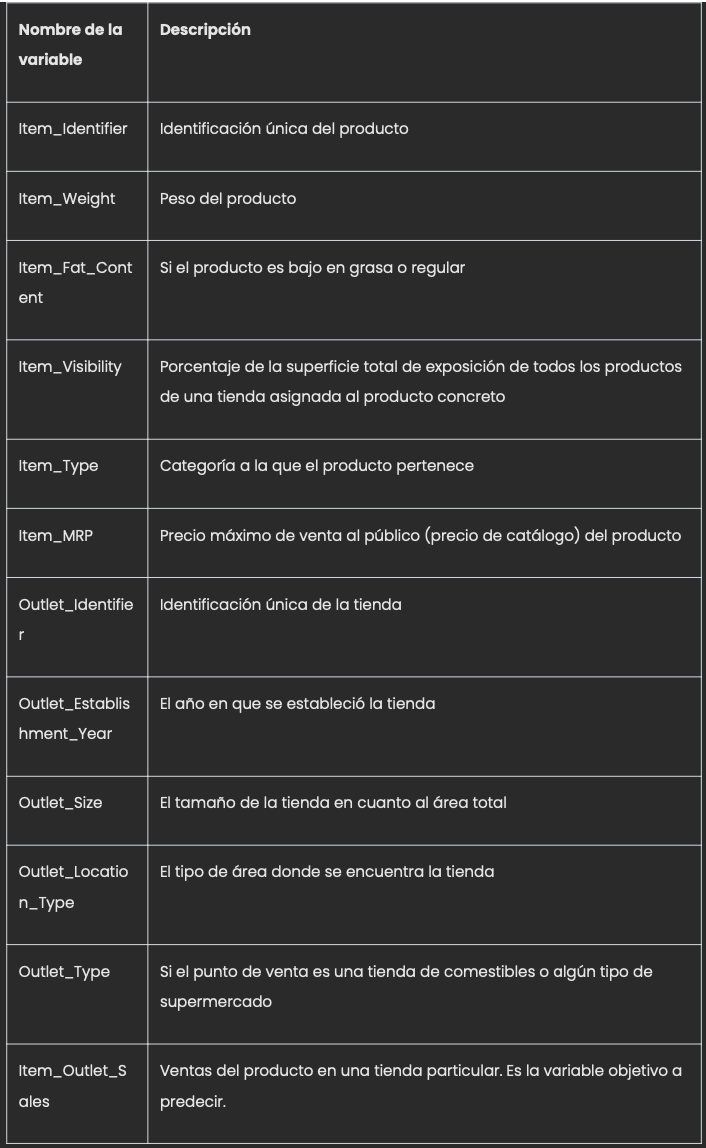

In [311]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [312]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [313]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 1) ¿Cuántas filas y columnas?

El total de columnas son 11 y la cantidad de filas son 8,523.

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 2) ¿Cuáles son los tipos de datos en cada variable?

- 0   Item_Identifier           object 
- 1   Item_Weight               float64
- 2   Item_Fat_Content          object 
- 3   Item_Visibility           float64
- 4   Item_Type                 object 
- 5   Item_MRP                  float64
- 6   Outlet_Identifier         object 
- 7   Outlet_Establishment_Yea  int64  
- 8   Outlet_Size               object 
- 9   Outlet_Location_Type      object 
- 10  Outlet_Type               object 
- 11  Item_Outlet_Sales         float64


In [315]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## 3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

No hay duplicados pero de todas formas aplicamos la formula, para eliminar los duplicados.

In [316]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [317]:
df.duplicated().sum()

0

In [318]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## 4) Identifiquen los valores faltantes.


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [320]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Existen los valores faltantes con la columna "Item Weight" y "Outlet Size".

Con muchos valores Item_Weight con 1463 valores faltantes y Outlet_Size con 2410 valores faltantes.

## 5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

Con Outlet Size vamos a darle un parametro que si Item_Outlet_Sales es >= a 13100 es High, es == a 73 es High,  debido a que las ventas pueden determinar el tamano

In [321]:
df.groupby(['Outlet_Size']).min()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Size,,,,,,,,,,,
High,DRA12,4.555,LF,0.0,Baking Goods,31.4900,OUT013,1987,Tier 3,Supermarket Type1,73.2380
Medium,DRA12,4.555,LF,0.0,Baking Goods,31.2900,OUT018,1985,Tier 1,Supermarket Type1,69.2432
Small,DRA12,4.555,LF,0.0,Baking Goods,32.0558,OUT019,1985,Tier 1,Grocery Store,33.9558


In [322]:
df.groupby('Outlet_Size').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Size,,,,,
High,13.006148,0.059957,141.425982,1987.000000,2298.995256
Medium,12.895420,0.060142,140.590514,1997.635875,2681.603542
Small,12.848075,0.071383,141.970209,1997.072864,1912.149161


In [323]:
df.groupby('Outlet_Size').mean()['Item_Outlet_Sales']

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [324]:
df.groupby(['Outlet_Type','Outlet_Size']).min()

Item_Identifier  Item_Weight Item_Fat_Content  \
Outlet_Type       Outlet_Size                                                 
Grocery Store     Small                 DRA24          NaN               LF   
Supermarket Type1 High                  DRA12        4.555               LF   
                  Medium                DRA24        4.555               LF   
                  Small                 DRA12        4.555               LF   
Supermarket Type2 Medium                DRA12        4.610               LF   
Supermarket Type3 Medium                DRA24          NaN               LF   

                               Item_Visibility     Item_Type  Item_MRP  \
Outlet_Type       Outlet_Size                                            
Grocery Store     Small                    0.0  Baking Goods   34.2216   
Supermarket Type1 High                     0.0  Baking Goods   31.4900   
                  Medium                   0.0  Baking Goods   32.4900   
                  Small                    0.0  Baking Goods   32.0558   
Supermarket Type2 Medium                   0.0  Baking Goods   31.8900   
Supermarket Type3 Medium                   0.0  Baking Goods   31.2900   

                              Outlet_Identifier  Outlet_Establishment_Year  \
Outlet_Type       Outlet_Size                                                
Grocery Store     Small                  OUT019                       1985   
Supermarket Type1 High                   OUT013                       1987   
                  Medium                 OUT049                       1999   
                  Small                  OUT035                       1997   
Supermarket Type2 Medium                 OUT018                       2009   
Supermarket Type3 Medium                 OUT027                       1985   

                              Outlet_Location_Type  Item_Outlet_Sales  
Outlet_Type       Outlet_Size                                          
Grocery Store     Small                     Tier 1            33.9558  
Supermarket Type1 High                      Tier 3            73.2380  
                  Medium                    Tier 1           111.8544  
                  Small                     Tier 1           101.8674  
Supermarket Type2 Medium                    Tier 3            69.2432  
Supermarket Type3 Medium                    Tier 3           241.6854

In [325]:
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [326]:
filtro_1 = df['Outlet_Type'] == 'Outlet_Identifier'
df[filtro_1].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [327]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [334]:
df.groupby(['Outlet_Identifier'])['Outlet_Size'].max()

Outlet_Identifier
OUT010     Small
OUT013      High
OUT017      High
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045      High
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

In [329]:
def imputar_outlet(col):
    Outlet_Size = col[0]
    Outlet_Identifier = col[1]
    
    if pd.isnull(Outlet_Size):
        
        if Outlet_Identifier ==   'OUT010': 
            return "Small"
        elif Outlet_Identifier == 'OUT013':
            return "High"
        elif Outlet_Identifier == 'OUT017':
            return "High"
        elif Outlet_Identifier == 'OUT018':
            return "Medium"
        elif Outlet_Identifier == 'OUT019':
            return "Small"
        elif Outlet_Identifier == 'OUT027':
            return "Medium"
        elif Outlet_Identifier == 'OUT035':
            return "Small"
        elif Outlet_Identifier == 'OUT045':
            return "High"
        elif Outlet_Identifier == 'OUT046':
            return "Small"
        else:
            return "Medium"
    else:
        return Outlet_Size

In [330]:
df['Outlet_Size'] = df[['Outlet_Size','Outlet_Identifier']].apply(imputar_outlet,axis=1)

### La razon para utilizar esta funcion para rellenar los datos, fue que determinamos en nuestro analisis exploratorio de que habia una  correlacion en Outlet_Identifier, cada codigo se refiere con los tamanos del espacio, como era una cantidad relevante de datos, queriamos llenarlos con la mayor cercania posible.

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [336]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [337]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [338]:
def media_identifier (Item_Identifier):
    
    filtro = df["Item_Identifier"] == Item_Identifier
    values_mean = df[filtro]["Item_Weight"].mean()
    return values_mean

filter_isna = df["Item_Weight"].isna()
df.loc[filter_isna,'Item_Weight'] = df.apply(lambda x: media_identifier( x["Item_Identifier"]), axis = 'columns')
df[filter_isna]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,19.100,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [339]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [340]:
la_media = df['Item_Weight'].mean()
df['Item_Weight'].fillna(la_media, inplace=True)

### Para los datos faltantes de la columna Item_Weight llenamos con los valores medio de la columna Item_Identifier, ya que cada Item tiene un peso determinado, lo que permite ser identificado. Como habia 4 articulos que no fueron identificados los rellenamos con la media, para no eliminar esas 4 filas. Que pueden traer datos importantes.                  

## 6) Confirmen que no hay valores faltantes después de abordarlos.

In [341]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


## 7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

La columna Item_Fat_Content contiene errores con sus categorias, vamos a llevarla a solo dos.

In [234]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [235]:
df.groupby(['Item_Type']).mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,12.285317,0.069169,126.380766,1997.728395,1952.971207
Breads,11.297689,0.066255,140.952669,1997.657371,2204.132226
Breakfast,12.779727,0.085723,141.788151,1997.336364,2111.808651
Canned,12.403320,0.068129,139.763832,1998.152542,2225.194904
Dairy,13.379905,0.072427,148.499208,1997.681818,2232.542597
Frozen Foods,12.782404,0.065645,138.503366,1998.024533,2132.867744
Fruits and Vegetables,13.236713,0.068513,144.581235,1997.719968,2289.009592
Hard Drinks,11.456238,0.064943,137.077928,1998.177570,2139.221622
Health and Hygiene,13.052327,0.055216,130.818921,1997.734615,2010.000265


### Aqui Identificamos un error pues LF corresponde a Low Fat, Reg a Regular.

Corregir las categorias incorrectas.

In [236]:
df.groupby(['Item_Fat_Content']).mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
LF,12.960237,0.066628,138.788311,1997.936709,2073.551928
Low Fat,12.975812,0.064166,140.968921,1997.847121,2164.477336
Regular,12.694633,0.069564,141.714476,1997.807892,2235.186702
low fat,12.599554,0.065300,134.569043,1995.883929,2087.740737
reg,13.004103,0.066361,136.313513,1999.341880,1962.192268


In [237]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## 8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [238]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [239]:
df['Item_Weight'].describe()

count    8519.000000
mean       12.875420
std         4.646098
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [240]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [241]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [242]:
df['Item_MRP'].describe()


count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [243]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64